In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [25]:
from scipy.signal import savgol_filter

In [26]:
df = pd.read_csv('C1.csv')
df[['Date']]=df[['Date']].replace('2021-1-1','2021-01-01')
df[['Date']]=df[['Date']].replace('2021-1-2','2021-01-02')
df[['Date']]=df[['Date']].replace('2021-1-3','2021-01-03')
df[['Date']]=df[['Date']].replace('2021-1-4','2021-01-04')
df[['Date']]=df[['Date']].replace('2021-1-5','2021-01-05')
df[['Date']]=df[['Date']].replace('2021-1-6','2021-01-06')
df[['Date']]=df[['Date']].replace('2021-1-7','2021-01-07')
df[['Date']]=df[['Date']].replace('2021-1-8','2021-01-08')
df[['Date']]=df[['Date']].replace('2021-1-9','2021-01-09')
df[['Date']]=df[['Date']].replace('2021-1-10','2021-01-10')
df

,Date,Time,DDC-B-1F-02-1019-CO2-HTC,DDC-B-2F-01-2069-CO2-HTC,DDC-B-1F-01-1052-CO2-HTC,DDC-B-2F-01-2050-CO2-HTC
0,2021/1/1,8:00:00,433.530273,442.294128,468.661438,499.565430
1,2021/1/1,8:05:00,444.231689,440.692200,474.630615,488.044739
2,2021/1/1,8:10:00,439.455750,443.183411,464.977478,482.051941
3,2021/1/1,8:15:00,443.330017,440.790405,472.677734,492.107239
4,2021/1/1,8:20:00,433.579529,442.526184,467.686340,493.145691
...,...,...,...,...,...,...
2818,2021/1/11,2:30:00,NaN,NaN,495.356323,NaN
2819,2021/1/11,2:35:00,NaN,NaN,490.528442,NaN
2820,2021/1/11,2:40:00,NaN,NaN,490.476624,NaN
2821,2021/1/11,2:45:00,NaN,NaN,488.688171,NaN


In [27]:
x = '06'
date = '2021-01-'+x
df01 =df.loc[df['Date'].str.contains(date)]

In [28]:
df01 = df.iloc[1346:1635, :]
df01.set_index('Time',inplace= True)
df01.drop(['Date'],axis=1)

,DDC-B-1F-02-1019-CO2-HTC,DDC-B-2F-01-2069-CO2-HTC,DDC-B-1F-01-1052-CO2-HTC,DDC-B-2F-01-2050-CO2-HTC
Time,,,,
0:00:00,447.268982,440.132324,450.944458,459.487427
0:05:00,448.382690,440.133362,453.555115,469.264771
0:10:00,436.974976,440.011292,455.660339,463.180298
0:15:00,441.106873,430.795044,448.323425,468.388794
0:20:00,439.815002,434.192078,448.664673,464.927734
...,...,...,...,...
23:35:00,452.882813,438.560852,468.935120,479.647949
23:40:00,444.625183,434.903809,475.787659,479.070740
23:45:00,452.871826,435.828674,472.978943,480.435852


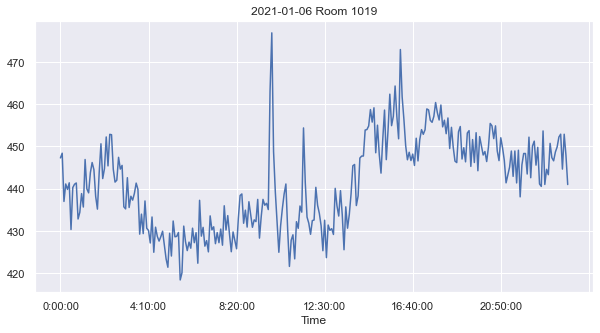

In [29]:
Cdata1 = df01.iloc[:, 1]
Cdata1 = Cdata1.fillna(method='ffill')
Cdata1.plot(figsize=(10, 5), title=date +' '+ 'Room 1019')

In [30]:
Cdata1

Time
0:00:00     447.268982
0:05:00     448.382690
0:10:00     436.974976
0:15:00     441.106873
0:20:00     439.815002
               ...    
23:35:00    452.882813
23:40:00    444.625183
23:45:00    452.871826
23:50:00    447.910339
23:55:00    440.973328
Name: DDC-B-1F-02-1019-CO2-HTC  , Length: 289, dtype: float64

In [31]:
t = np.arange(289)
dt = 5

In [32]:
n = len(t)
fhat = np.fft.fft(Cdata1,n)
PSD = fhat * np.conj(fhat)/n
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype = 'int')

/Users/sherrypan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


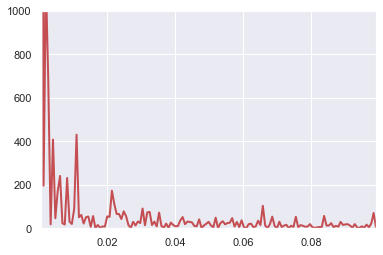

In [33]:
# plot power spectrum
plt.plot(freq[L],PSD[L],color = 'r', LineWidth = 2)
plt.xlim(freq[L[0]],freq[L[-1]])
plt.ylim(0,1000)
plt.show()

In [34]:
# filter out noise
indices = PSD > 80
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

/Users/sherrypan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


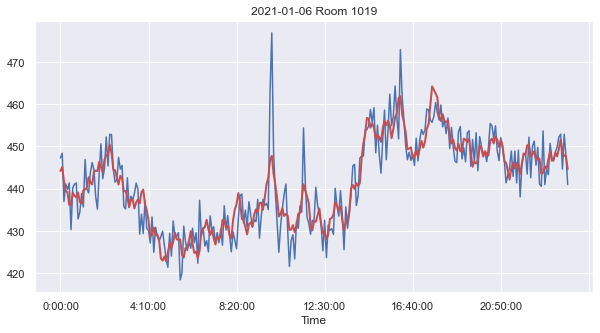

In [35]:
plt.figure(figsize=(10, 5))
Cdata1.plot(figsize=(10, 5), color = 'b', title=date +' '+ 'Room 1019')
plt.plot(t,ffilt,color = 'r', LineWidth = 2)
plt.show()

In [38]:
from scipy.signal import savgol_filter

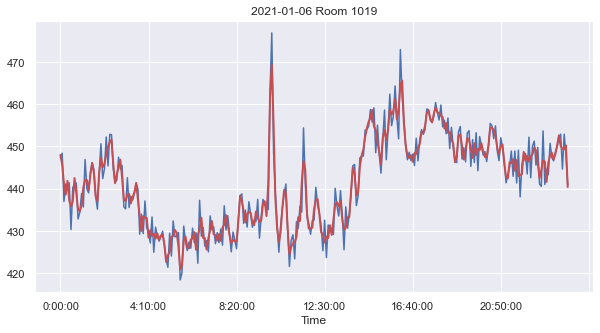

In [53]:
Cdata1_smooth = savgol_filter(Cdata1,5,3)
Cdata1.plot(figsize=(10, 5), title=date +' '+ 'Room 1019')
plt.plot(Cdata1_smooth,linewidth = 2, color = 'r')

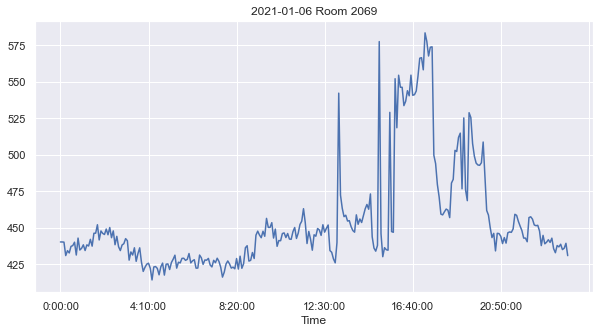

In [201]:
Cdata1 = df01.iloc[:, 2]
Cdata1 = Cdata1.fillna(method='ffill')
f = Cdata1.plot(figsize=(10, 5), title=date +' '+ 'Room 2069')

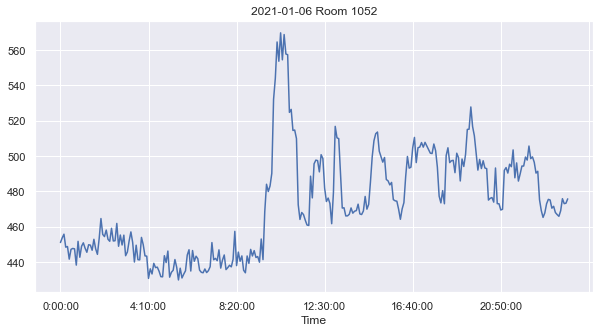

In [125]:
Cdata1 = df01.iloc[:, 3]
Cdata1 = Cdata1.fillna(method='ffill')
Cdata1.plot(figsize=(10, 5), title=date +' '+ 'Room 1052')

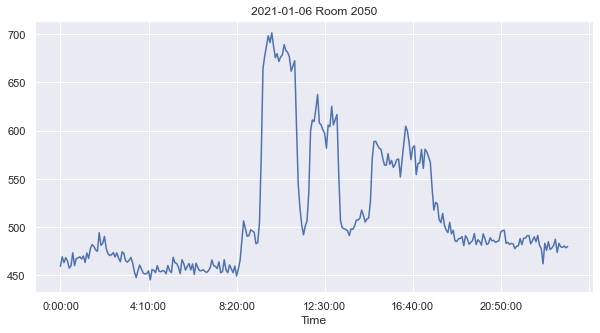

In [126]:
Cdata1 = df01.iloc[:, 4]
Cdata1 = Cdata1.fillna(method='ffill')
Cdata1.plot(figsize=(10, 5), title=date +' '+ 'Room 2050')

In [127]:
Cdata11 = Cdata1.copy()
Cdata11

Time
0:00:00     459.487427
0:05:00     469.264771
0:10:00     463.180298
0:15:00     468.388794
0:20:00     464.927734
               ...    
23:35:00    479.647949
23:40:00    479.070740
23:45:00    480.435852
23:50:00    478.639038
23:55:00    479.921570
Name: DDC-B-2F-01-2050-CO2-HTC  , Length: 289, dtype: float64

In [128]:
for i in range (1,len(Cdata1)):
    Cdata11[i-1] = (Cdata1[i]-Cdata1[i-1])/0.1

In [129]:
Cdata1

Time
0:00:00     459.487427
0:05:00     469.264771
0:10:00     463.180298
0:15:00     468.388794
0:20:00     464.927734
               ...    
23:35:00    479.647949
23:40:00    479.070740
23:45:00    480.435852
23:50:00    478.639038
23:55:00    479.921570
Name: DDC-B-2F-01-2050-CO2-HTC  , Length: 289, dtype: float64

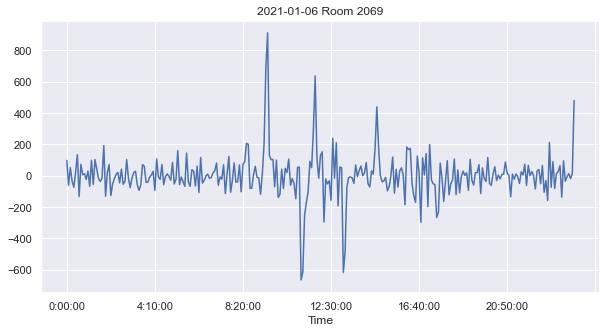

In [130]:
# Cdata1 = Cdata1.fillna(method='ffill')
f = Cdata11.plot(figsize=(10, 5), title=date +' '+ 'Room 2069')

In [131]:
df01

,Date,DDC-B-1F-02-1019-CO2-HTC,DDC-B-2F-01-2069-CO2-HTC,DDC-B-1F-01-1052-CO2-HTC,DDC-B-2F-01-2050-CO2-HTC
Time,,,,,
0:00:00,2021/1/6,447.268982,440.132324,450.944458,459.487427
0:05:00,2021/1/6,448.382690,440.133362,453.555115,469.264771
0:10:00,2021/1/6,436.974976,440.011292,455.660339,463.180298
0:15:00,2021/1/6,441.106873,430.795044,448.323425,468.388794
0:20:00,2021/1/6,439.815002,434.192078,448.664673,464.927734
...,...,...,...,...,...
23:35:00,2021/1/6,452.882813,438.560852,468.935120,479.647949
23:40:00,2021/1/6,444.625183,434.903809,475.787659,479.070740
23:45:00,2021/1/6,452.871826,435.828674,472.978943,480.435852


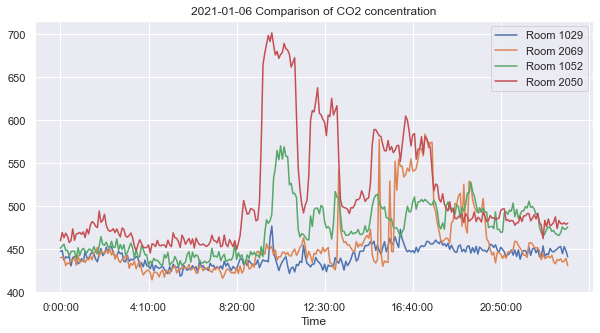

In [132]:
Cdata = df01.iloc[:, 1:5]
Cdata.columns = ['Room 1029', 'Room 2069', 'Room 1052', 'Room 2050']
Cdata = Cdata.fillna(method='ffill')
Cdata.plot(figsize=(10, 5),  title=date +' '+ 'Comparison of CO2 concentration')

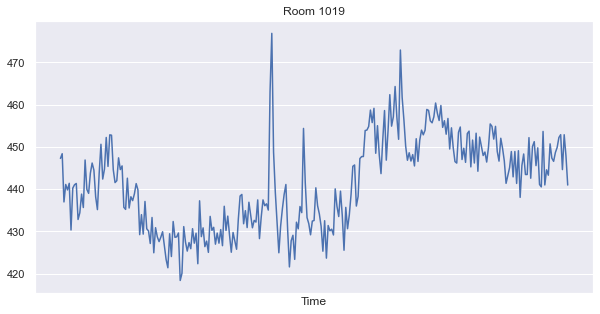

In [133]:
Cdata1 = df01.iloc[:, 1]
Cdata1 = Cdata1.fillna(method='bfill')
Cdata1.values
Cdata1.plot(figsize=(10, 5), xticks=[], title= 'Room 1019')

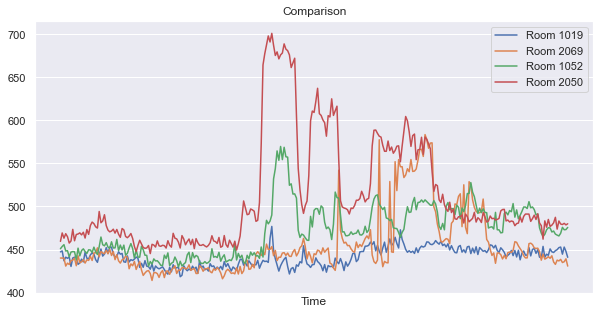

In [134]:
Cdata = df01.iloc[:, 1:5]
Cdata.columns = ['Room 1019', 'Room 2069', 'Room 1052', 'Room 2050']
Cdata = Cdata.fillna(method='bfill')
Cdata.plot(figsize=(10, 5),  xticks=[], title= 'Comparison')